# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import joblib
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [19]:
df = pd.read_csv('../data/dayofweek.csv')

In [20]:
# Разделение данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=21
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Проверка распределения классов в обучающей и тестовой выборках
print("Распределение классов в обучающей выборке:\n", y_train.value_counts())
print("Распределение классов в тестовой выборке:\n", y_test.value_counts())

Распределение классов в обучающей выборке:
 dayofweek
3    313
6    287
1    222
5    216
2    125
0    105
4     80
Name: count, dtype: int64
Распределение классов в тестовой выборке:
 dayofweek
3    83
6    69
5    55
1    52
0    31
4    24
2    24
Name: count, dtype: int64


In [21]:
# Разделение данных с использованием параметра stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Проверка распределения классов после стратификации
print("Распределение классов в обучающей выборке после стратификации:\n", y_train.value_counts())
print("Распределение классов в тестовой выборке после стратификации:\n", y_test.value_counts())

Распределение классов в обучающей выборке после стратификации:
 dayofweek
3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: count, dtype: int64
Распределение классов в тестовой выборке после стратификации:
 dayofweek
3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: count, dtype: int64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [22]:
# Обучение модели логистической регрессии
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"Точность модели логистической регрессии: {accuracy_logreg}")

Точность модели логистической регрессии: 0.621301775147929


### b. SVM

In [23]:
# Обучение модели метода опорных векторов
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Точность модели метода опорных векторов: {accuracy_svm}")

Точность модели метода опорных векторов: 0.8461538461538461


### c. Decision tree

In [24]:
# Обучение модели дерева решений
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f"Точность модели дерева решений: {accuracy_tree}")

Точность модели дерева решений: 0.8698224852071006


### d. Random forest

In [25]:
# Обучение модели рандомного леса
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Точность модели рандомного леса: {accuracy_rf}")

Точность модели рандомного леса: 0.9289940828402367


**Лучшая модель - Random Forest**

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [26]:
# Кросс-валидация для модели логистической регрессии
logreg_model = LogisticRegression(solver='liblinear')
scores_logreg = cross_val_score(logreg_model, X_train, y_train, cv=10)
mean_logreg = np.mean(scores_logreg)
std_logreg = np.std(scores_logreg)
print(f"Точность модели логистической регрессии по кросс-валидации: среднее={mean_logreg}, стандартное отклонение={std_logreg}")

Точность модели логистической регрессии по кросс-валидации: среднее=0.5927363184079601, стандартное отклонение=0.019852534178785148


### b. SVM

In [27]:
# Кросс-валидация для модели метода опорных векторов
svm_model = SVC()
scores_svm = cross_val_score(svm_model, X_train, y_train, cv=10)
mean_svm = np.mean(scores_svm)
std_svm = np.std(scores_svm)
print(f"Точность модели метода опорных векторов по кросс-валидации: среднее={mean_svm}, стандартное отклонение={std_svm}")

Точность модели метода опорных векторов по кросс-валидации: среднее=0.7833333333333334, стандартное отклонение=0.025446087664058065


### c. Decision tree

In [28]:
# Кросс-валидация для модели дерева решений
tree_model = DecisionTreeClassifier()
scores_tree = cross_val_score(tree_model, X_train, y_train, cv=10)
mean_tree = np.mean(scores_tree)
std_tree = np.std(scores_tree)
print(f"Точность модели дерева решений по кросс-валидации: среднее={mean_tree}, стандартное отклонение={std_tree}")

Точность модели дерева решений по кросс-валидации: среднее=0.8887119955776672, стандартное отклонение=0.02101673815358751


### d. Random forest

In [29]:
rf_model = RandomForestClassifier()
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=10)
mean_rf = np.mean(scores_rf)
std_rf = np.std(scores_rf)
print(f"Точность модели случайного леса по кросс-валидации: среднее={mean_rf}, стандартное отклонение={std_rf}")

Точность модели случайного леса по кросс-валидации: среднее=0.9131896075179657, стандартное отклонение=0.016996650807789646


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [30]:
# Выбор лучшей модели и настройка параметров
best_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(best_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [31]:
# Лучшие параметры и точность
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Точность на тестовой выборке
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Точность лучшей модели на тестовой выборке: {test_accuracy}")

Точность лучшей модели на тестовой выборке: 0.9349112426035503


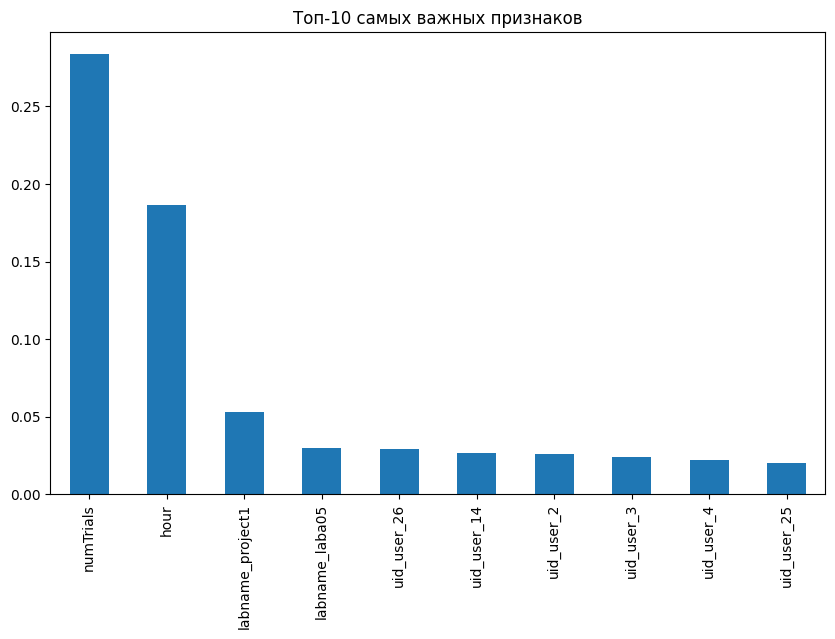

In [32]:
# Важность признаков
importances = best_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# График важности признаков
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar')
plt.title('Топ-10 самых важных признаков')
plt.show()

In [33]:
# Сохранение модели
joblib.dump(best_model, '../data/best_model.pkl')

# Загрузка модели и предсказание
loaded_model = joblib.load('../data/best_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, y_pred_loaded)
print(f"Точность загруженной модели: {loaded_accuracy}")

Точность загруженной модели: 0.9349112426035503


In [34]:
# Подсчет и вывод ответа на вопрос: "Какая модель имеет наибольшую разницу в точности по сравнению с предыдущим упражнением?"
previous_accuracies = {
    'Logreg': 0.6272189349112426,
    'SVM': 0.7159763313609467,
    'Decision Tree': 0.5295857988165681,
    'Random Forest': 0.9289940828402367
}

current_accuracies = {
    'Logreg': accuracy_logreg,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'Random Forest': accuracy_rf
}

differences = {model: abs(current_accuracies[model] - previous_accuracies[model]) for model in current_accuracies}
max_difference_model = max(differences, key=differences.get)

print(f"Модель с наибольшей разницей в точности по сравнению с предыдущим упражнением: {max_difference_model}")

Модель с наибольшей разницей в точности по сравнению с предыдущим упражнением: Decision Tree
